In [1]:
import os
import spectral
from spectral import *
import sys
import osgeo
from osgeo import gdal, gdalconst 
from osgeo.gdalconst import * 
import hs_process
from hs_process import hsio
io = hsio()

## Define function to load image array and geo-information from HSI

In [2]:
def load_data(file_name, gdal_driver='GTiff'):
    driver = gdal.GetDriverByName(gdal_driver) ## http://www.gdal.org/formats_list.html
    driver.Register()

    inDs = gdal.Open(file_name, GA_ReadOnly)

    if inDs is None:
        print("Couldn't open this file: %s" %(file_name))
        print('/nPerhaps you need an ENVI .hdr file? A quick way to do this is to just open the binary up in ENVI and one will be created for you.')
        sys.exit("Try again!")
    else:
        print("%s opened successfully" %file_name)

    # Extract some info form the inDs 
    geotransform = inDs.GetGeoTransform()
    band = inDs.GetRasterBand(1)
    cols = inDs.RasterXSize
    rows = inDs.RasterYSize
    image_array = band.ReadAsArray(0, 0, cols, rows)
    #image_array = inDs.ReadAsArray()

    return image_array, (geotransform, inDs)

## Define function to write image array into GeoTiff

In [3]:
def array2raster(data_array, geodata, file_out, gdal_driver='GTiff'):
    
    if not os.path.exists(os.path.dirname(file_out)):
        print("Your output directory doesn't exist - please create it")
        print("No further processing will take place.")
    else:
        post=geodata[0][1]
        original_geotransform, inDs = geodata
        
        rows, cols, bands = data_array.shape
        #bands = 1
        
        driver = gdal.GetDriverByName(gdal_driver) 
        driver.Register()

    # Creates a new raster data source
        outDs = driver.Create(file_out, cols, rows, bands, gdal.GDT_Float32)

    # Write metadata
        originX = original_geotransform[0]
        originY = original_geotransform[3]
        
        outDs.SetGeoTransform([originX, post, 0.0, originY, 0.0, -post])
        outDs.SetProjection(inDs.GetProjection())

    #Write raster datasets
        #outDs.GetRasterBand(1).WriteArray(data_array)
        
        for i in range(bands):
            outBand = outDs.GetRasterBand(i+1)
            outBand.WriteArray(data_array[:,:,i][:,:,0])
            

    print("Output saved: %s" %file_out)

## Define function to write GeoTIFF when given hdr file and bip file

In [20]:
def bip2tiff(hdr_file):
    bip_file = hdr_file.split('.hdr')[0]
    data, geodata = load_data(bip_file, gdal_driver="GTiff")
    
    io.read_spec(hdr_file)
    imgs = io.spyfile_spec
    
    file_out = "./"+ hdr_file.split('-')[0] + '.tif'
    array2raster(imgs, geodata, file_out, gdal_driver='GTiff')

## Set work directory and load data

In [16]:
os.chdir("C:/users/Liang/Desktop/UMN/research/Aerial HSI photos/2020-07-23_rosemount_wheat_2/ref_closest_panel")

In [17]:
fs = os.listdir()
bp = [f for f in fs if f.endswith('.bip')]
hd = [f for f in fs if f.endswith('.hdr')]

In [18]:
print(len(bp))
print(len(hd))

31
31


In [19]:
print(bp[:5])
print()
print(hd[:5])

['rep1_pika_gige_1-Radiance From Raw Data-Georectify Airborne Datacube-Reflectance from Radiance Data and Measured Reference Spectrum.bip', 'rep1_pika_gige_2-Radiance From Raw Data-Georectify Airborne Datacube-Reflectance from Radiance Data and Measured Reference Spectrum.bip', 'rep1_pika_gige_3-Radiance From Raw Data-Georectify Airborne Datacube-Reflectance from Radiance Data and Measured Reference Spectrum.bip', 'rep1_pika_gige_4-Radiance From Raw Data-Georectify Airborne Datacube-Reflectance from Radiance Data and Measured Reference Spectrum.bip', 'rep2_pika_gige_1-Radiance From Raw Data-Georectify Airborne Datacube-Reflectance from Radiance Data and Measured Reference Spectrum.bip']

['rep1_pika_gige_1-Radiance From Raw Data-Georectify Airborne Datacube-Reflectance from Radiance Data and Measured Reference Spectrum.bip.hdr', 'rep1_pika_gige_2-Radiance From Raw Data-Georectify Airborne Datacube-Reflectance from Radiance Data and Measured Reference Spectrum.bip.hdr', 'rep1_pika_gige_

## Write loop to convert all HSI data

In [21]:
for hdf in hd:
    bip2tiff(hdf)

rep1_pika_gige_1-Radiance From Raw Data-Georectify Airborne Datacube-Reflectance from Radiance Data and Measured Reference Spectrum.bip opened successfully
Output saved: ./rep1_pika_gige_1.tif
rep1_pika_gige_2-Radiance From Raw Data-Georectify Airborne Datacube-Reflectance from Radiance Data and Measured Reference Spectrum.bip opened successfully
Output saved: ./rep1_pika_gige_2.tif
rep1_pika_gige_3-Radiance From Raw Data-Georectify Airborne Datacube-Reflectance from Radiance Data and Measured Reference Spectrum.bip opened successfully
Output saved: ./rep1_pika_gige_3.tif
rep1_pika_gige_4-Radiance From Raw Data-Georectify Airborne Datacube-Reflectance from Radiance Data and Measured Reference Spectrum.bip opened successfully
Output saved: ./rep1_pika_gige_4.tif
rep2_pika_gige_1-Radiance From Raw Data-Georectify Airborne Datacube-Reflectance from Radiance Data and Measured Reference Spectrum.bip opened successfully
Output saved: ./rep2_pika_gige_1.tif
rep2_pika_gige_2-Radiance From Raw 

In [12]:
hdr_file = hd[0]
print(hdr_file)
bip_file = hdr_file.split('.hdr')[0]
print(bip_file)

data, geodata = load_data(bip_file, gdal_driver="GTiff")
print(data.shape)    

io.read_spec(hdr_file)
imgs = io.spyfile_spec
print(imgs.shape)    

file_out = "/"+ hdr_file.split('-')[0] + '.tif'
print(file_out)    

rep1_pika_gige_1-Radiance From Raw Data-Georectify Airborne Datacube-Reflectance from Radiance Data and Measured Reference Spectrum.bip.hdr
rep1_pika_gige_1-Radiance From Raw Data-Georectify Airborne Datacube-Reflectance from Radiance Data and Measured Reference Spectrum.bip
rep1_pika_gige_1-Radiance From Raw Data-Georectify Airborne Datacube-Reflectance from Radiance Data and Measured Reference Spectrum.bip opened successfully
(740, 1611)
(740, 1611, 240)
/rep1_pika_gige_1.tif


In [ ]:
array2raster(imgs, geodata, file_out, gdal_driver='GTiff')

## Case study on the first HSI file

In [51]:
file_name = bp[0]
data, geodata=load_data(file_name, gdal_driver='GTiff')

rep1_pika_gige_1-Radiance From Raw Data-Georectify Airborne Datacube-Reflectance from Radiance Data and Measured Reference Spectrum.bip opened successfully


In [52]:
data.shape

(740, 1611)

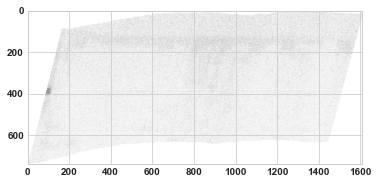

In [53]:
import matplotlib.pyplot as plt
plt.imshow(data)

In [54]:
geodata

((492032.165115, 0.02, -0.0, 4953018.60215, -0.0, -0.02),
 <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x00000146BBC33180> >)

## Load all bands  into data array

In [55]:
io.read_spec(hd[0])
imgs = io.spyfile_spec

In [57]:
print(imgs)
print(imgs.shape)

	Data Source:   '.\rep1_pika_gige_1-Radiance From Raw Data-Georectify Airborne Datacube-Reflectance from Radiance Data and Measured Reference Spectrum.bip'
	# Rows:            740
	# Samples:        1611
	# Bands:           240
	Interleave:        BIP
	Quantization:  32 bits
	Data format:   float32
(740, 1611, 240)


## Write HSI to GeoTIFF

In [58]:
file_out = "./test5.tif"
array2raster(imgs, geodata, file_out, gdal_driver='GTiff')

Output saved: ./test5.tif
